In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics import log_loss, accuracy_score
from sklearn.utils.extmath import safe_sparse_dot

%matplotlib inline

In [14]:
import optim.gradient_descent_optimizers

TabError: inconsistent use of tabs and spaces in indentation (gradient_descent_optimizers.py, line 25)

In [12]:
from logistic_regression import LogisticRegressionWithSGD
from optim.gradient_descent_optimizers import SGDOptimizer 
from utils import read_sparse_h5

from optim.momentum import SGDWithMomentum
from optim.adaptive import RMSProp, AdaGrad

ImportError: No module named 'gradient_descent_optimizers'

In [ ]:
lr = 0.01
momentum = 0.9
decay = 1e-3
num_epochs = 100
batchsize = 8192
l2_reg = 1e-3
nesterov_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=decay, nesterov=True, num_epochs=num_epochs, batchsize=batchsize, l2_reg=l2_reg)
momentum_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=decay, nesterov=False, num_epochs=num_epochs, batchsize=batchsize, l2_reg=l2_reg)
rms_opt = RMSProp(lr=lr, decay=decay, num_epochs=num_epochs, batchsize=batchsize, l2_reg=l2_reg)

## test dataset with softmax

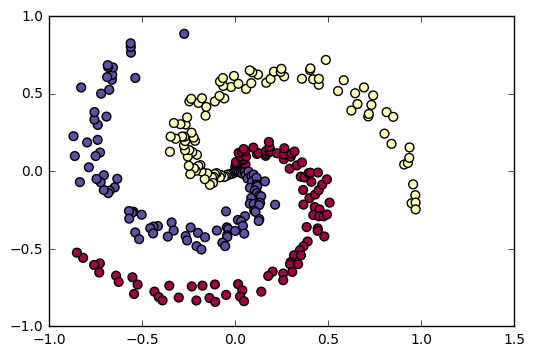

In [167]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [168]:
np.max(y) + 1, K, X.shape

(3, 3, (300, 2))

In [169]:
num_features = X.shape[1]
num_classes = np.max(y) + 1

In [170]:
lr_clf = LogisticRegressionWithSGD()
lr_loss_history = lr_clf.train(X, y, num_features, num_classes, num_iter=150, learning_rate=1.0, l2_reg_param=1e-3, decay=1e-3, batch_size=X.shape[0])

iteration 0, loss 1.096454
iteration 1, loss 1.067629
iteration 2, loss 1.041975
iteration 3, loss 1.019130
iteration 4, loss 0.998766
iteration 5, loss 0.980589
iteration 6, loss 0.964338
iteration 7, loss 0.949785
iteration 8, loss 0.936727
iteration 9, loss 0.924990
iteration 10, loss 0.914418
iteration 11, loss 0.904878
iteration 12, loss 0.896252
iteration 13, loss 0.888439
iteration 14, loss 0.881347
iteration 15, loss 0.874900
iteration 16, loss 0.869028
iteration 17, loss 0.863670
iteration 18, loss 0.858775
iteration 19, loss 0.854294
iteration 20, loss 0.850187
iteration 21, loss 0.846417
iteration 22, loss 0.842951
iteration 23, loss 0.839762
iteration 24, loss 0.836822
iteration 25, loss 0.834110
iteration 26, loss 0.831604
iteration 27, loss 0.829288
iteration 28, loss 0.827143
iteration 29, loss 0.825155
iteration 30, loss 0.823312
iteration 31, loss 0.821601
iteration 32, loss 0.820012
iteration 33, loss 0.818534
iteration 34, loss 0.817159
iteration 35, loss 0.815879
it

In [171]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear', max_iter=200, multi_class='ovr')

In [172]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [173]:
from sklearn.metrics import log_loss, accuracy_score
sklearn_probs = clf.predict_proba(X)
log_loss(y, sklearn_probs), accuracy_score(y, np.argmax(sklearn_probs, axis=1))

(0.78916614559822185, 0.5)

In [174]:
my_probs = lr_clf.predict_proba(X)
log_loss(y, my_probs), accuracy_score(y, np.argmax(my_probs, axis=1))

(0.79295116703898194, 0.5033333333333333)

## iris

In [175]:
import sklearn.datasets

In [176]:
iris = sklearn.datasets.load_iris()
X = iris.data
y = iris.target
num_features = X.shape[1]
num_classes = np.max(y) + 1
X.shape, y.shape

((150, 4), (150,))

In [177]:
lr_clf = LogisticRegressionWithSGD()
lr_loss_history = lr_clf.train(X, y, num_features, num_classes, num_iter=200, learning_rate=0.4, 
                               l2_reg_param=1e-3, decay=1e-4, batch_size=X.shape[0])

iteration 0, loss 1.100141
iteration 1, loss 1.540988
iteration 2, loss 5.752291
iteration 3, loss 4.970968
iteration 4, loss 7.256275
iteration 5, loss 8.579802
iteration 6, loss 3.840669
iteration 7, loss 2.554175
iteration 8, loss 3.962839
iteration 9, loss 1.971147
iteration 10, loss 4.286922
iteration 11, loss 1.698871
iteration 12, loss 4.410436
iteration 13, loss 1.390622
iteration 14, loss 4.556835
iteration 15, loss 1.082053
iteration 16, loss 4.490307
iteration 17, loss 1.002784
iteration 18, loss 4.582048
iteration 19, loss 0.753681
iteration 20, loss 3.989615
iteration 21, loss 1.274072
iteration 22, loss 4.907385
iteration 23, loss 0.469925
iteration 24, loss 1.082019
iteration 25, loss 4.527072
iteration 26, loss 4.423734
iteration 27, loss 0.963838
iteration 28, loss 1.471541
iteration 29, loss 0.606197
iteration 30, loss 3.803408
iteration 31, loss 3.606894
iteration 32, loss 1.348062
iteration 33, loss 4.018421
iteration 34, loss 0.825287
iteration 35, loss 3.985915
it

In [178]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [179]:
from svm import LinearSVM
svm_iris_clf = LinearSVM()
svm_iris_clf.train(X, y, num_features, num_classes, 
                   num_iter=100, learning_rate=0.3, decay=1e-3, l2_reg_param=1e-3, batch_size=X.shape[0])

iteration 0, loss 2.038767
iteration 1, loss 4.050947
iteration 2, loss 14.019123
iteration 3, loss 7.658790
iteration 4, loss 6.934825
iteration 5, loss 3.641971
iteration 6, loss 9.917135
iteration 7, loss 7.145261
iteration 8, loss 2.844478
iteration 9, loss 5.012444
iteration 10, loss 3.370288
iteration 11, loss 8.148507
iteration 12, loss 1.221255
iteration 13, loss 5.559561
iteration 14, loss 2.958266
iteration 15, loss 7.768969
iteration 16, loss 1.184430
iteration 17, loss 5.172958
iteration 18, loss 2.696307
iteration 19, loss 6.699744
iteration 20, loss 1.399033
iteration 21, loss 4.323253
iteration 22, loss 2.753340
iteration 23, loss 5.596524
iteration 24, loss 1.571180
iteration 25, loss 3.379620
iteration 26, loss 2.646916
iteration 27, loss 3.881192
iteration 28, loss 2.139547
iteration 29, loss 2.612190
iteration 30, loss 2.499553
iteration 31, loss 2.456907
iteration 32, loss 2.456477
iteration 33, loss 1.620596
iteration 34, loss 2.221805
iteration 35, loss 1.942632
i

0.28574723650072797

In [180]:
svm_iris_clf_nest = LinearSVM()
svm_iris_clf_nest.train_with_opt(nesterov_opt, X, y, num_features, num_classes)

iteration 0, loss 2.015753
iteration 1, loss 1.791009
iteration 2, loss 1.667502
iteration 3, loss 1.460872
iteration 4, loss 1.393016
iteration 5, loss 1.118666
iteration 6, loss 0.924842
iteration 7, loss 0.944884
iteration 8, loss 0.767291
iteration 9, loss 0.659461
iteration 10, loss 0.626150
iteration 11, loss 0.645094
iteration 12, loss 0.643388
iteration 13, loss 0.660529
iteration 14, loss 0.635524
iteration 15, loss 0.620589
iteration 16, loss 0.613614
iteration 17, loss 0.602458
iteration 18, loss 0.592406
iteration 19, loss 0.580531
iteration 20, loss 0.558544
iteration 21, loss 0.547910
iteration 22, loss 0.539800
iteration 23, loss 0.529518
iteration 24, loss 0.504959
iteration 25, loss 0.496620
iteration 26, loss 0.482790
iteration 27, loss 0.472355
iteration 28, loss 0.476807
iteration 29, loss 0.464793
iteration 30, loss 0.463928
iteration 31, loss 0.464180
iteration 32, loss 0.462305
iteration 33, loss 0.463729
iteration 34, loss 0.474602
iteration 35, loss 0.476225
it

0.45429787587440301

In [181]:
svm_iris_clf_moment = LinearSVM()
svm_iris_clf_moment.train_with_opt(momentum_opt, X, y, num_features, num_classes)

iteration 0, loss 2.035116
iteration 1, loss 1.916828
iteration 2, loss 1.698318
iteration 3, loss 1.646862
iteration 4, loss 1.511434
iteration 5, loss 1.281085
iteration 6, loss 1.169697
iteration 7, loss 1.224115
iteration 8, loss 0.868561
iteration 9, loss 0.691602
iteration 10, loss 0.654719
iteration 11, loss 0.622121
iteration 12, loss 0.647242
iteration 13, loss 0.604596
iteration 14, loss 0.605959
iteration 15, loss 0.636781
iteration 16, loss 0.726970
iteration 17, loss 0.766382
iteration 18, loss 0.599456
iteration 19, loss 0.556724
iteration 20, loss 0.559343
iteration 21, loss 0.603123
iteration 22, loss 0.643036
iteration 23, loss 0.655414
iteration 24, loss 0.639020
iteration 25, loss 0.605378
iteration 26, loss 0.548517
iteration 27, loss 0.524466
iteration 28, loss 0.523952
iteration 29, loss 0.497273
iteration 30, loss 0.501702
iteration 31, loss 0.517878
iteration 32, loss 0.520409
iteration 33, loss 0.503059
iteration 34, loss 0.467693
iteration 35, loss 0.429133
it

0.44273709656227339

In [202]:
rms_opt = RMSProp(lr=1.0, decay=0., num_epochs=1000, batchsize=batchsize, l2_reg=l2_reg)
svm_iris_clf_rms = LinearSVM()
svm_iris_clf_rms.train_with_opt(rms_opt, X, y, num_features, num_classes)

iteration 0, loss 1.999564
iteration 1, loss 1.971415
iteration 2, loss 1.950994
iteration 3, loss 1.933896
iteration 4, loss 1.918717
iteration 5, loss 1.904807
iteration 6, loss 1.891804
iteration 7, loss 1.879480
iteration 8, loss 1.867686
iteration 9, loss 1.856313
iteration 10, loss 1.845284
iteration 11, loss 1.834538
iteration 12, loss 1.824031
iteration 13, loss 1.813724
iteration 14, loss 1.803588
iteration 15, loss 1.793600
iteration 16, loss 1.783738
iteration 17, loss 1.773987
iteration 18, loss 1.764332
iteration 19, loss 1.754761
iteration 20, loss 1.745264
iteration 21, loss 1.735833
iteration 22, loss 1.726458
iteration 23, loss 1.717135
iteration 24, loss 1.707856
iteration 25, loss 1.698617
iteration 26, loss 1.689450
iteration 27, loss 1.680725
iteration 28, loss 1.672004
iteration 29, loss 1.663480
iteration 30, loss 1.655866
iteration 31, loss 1.648238
iteration 32, loss 1.640688
iteration 33, loss 1.633628
iteration 34, loss 1.626892
iteration 35, loss 1.620538
it

0.84902303025569936

In [203]:
from sklearn.svm import LinearSVC
sklearn_svm = LinearSVC(loss="hinge")
sklearn_svm.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [204]:
sklearn_probs = logreg.predict_proba(X)
log_loss(y, sklearn_probs), accuracy_score(y, np.argmax(sklearn_probs, axis=1))

(0.16550260288465674, 0.97999999999999998)

In [205]:
my_probs = lr_clf.predict_proba(X)
log_loss(y, my_probs), accuracy_score(y, np.argmax(my_probs, axis=1))
#0.17749931140629041, 0.97333333333333338

(0.12808965256751104, 0.97333333333333338)

In [206]:
my_svm_probs = svm_iris_clf.predict_proba(X)
log_loss(y, my_svm_probs), accuracy_score(y, np.argmax(my_svm_probs, axis=1))
#1.0986122886681093, 0.97333333333333338

(1.0986122886681093, 0.95999999999999996)

In [4]:
import os
import h5py

parent_dir = "/Users/timwee/projects/nlp/courses/harvard_nlp/HW1"
f = h5py.File(os.path.join(parent_dir, "SST1.hdf5"), 'r')

In [5]:
#f.close()

In [6]:
for k in f.keys():
    print(k)

nclasses
nfeatures
test_input_data
test_input_indices
test_input_indptr
test_input_shape
train_input_data
train_input_indices
train_input_indptr
train_input_shape
train_output
valid_input_data
valid_input_indices
valid_input_indptr
valid_input_shape
valid_output


In [14]:
X = read_sparse_h5(f, "train_input")
y = f["train_output"]
valid_X = read_sparse_h5(f, "valid_input")
valid_y = f["valid_output"]
num_features = f["nfeatures"][0]
num_classes = f["nclasses"][0] + 1

In [15]:
num_features, num_classes, np.max(y), np.min(y)

(17837, 6, 5, 1)

In [16]:
np.bincount(y), np.bincount(valid_y)

(array([    0,  7189, 27513, 79856, 33016,  9243]),
 array([  0, 139, 289, 229, 279, 165]))

In [17]:
X.shape, y.shape

((156817, 17837), (156817,))

### LR

In [317]:
clf = LogisticRegression(penalty='l2', fit_intercept=True, solver='liblinear', max_iter=300, multi_class='ovr')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [316]:
lr_clf = LogisticRegressionWithSGD()
lr_loss_history = lr_clf.train(X, y, num_features, num_classes, num_iter=50, 
                               learning_rate=0.8, l2_reg_param=1e-3, batch_size=8192, decay=1e-5)

iteration 0, loss 1.745474
iteration 1, loss 1.725255
iteration 2, loss 1.708433
iteration 3, loss 1.693616
iteration 4, loss 1.680549
iteration 5, loss 1.668982
iteration 6, loss 1.658666
iteration 7, loss 1.649384
iteration 8, loss 1.640962
iteration 9, loss 1.633261
iteration 10, loss 1.626174
iteration 11, loss 1.619617
iteration 12, loss 1.613522
iteration 13, loss 1.607835
iteration 14, loss 1.602510
iteration 15, loss 1.597511
iteration 16, loss 1.592807
iteration 17, loss 1.588370
iteration 18, loss 1.584177
iteration 19, loss 1.580210
iteration 20, loss 1.576449
iteration 21, loss 1.572879
iteration 22, loss 1.569487
iteration 23, loss 1.566261
iteration 24, loss 1.563189
iteration 25, loss 1.560261
iteration 26, loss 1.557469
iteration 27, loss 1.554803
iteration 28, loss 1.552257
iteration 29, loss 1.549823
iteration 30, loss 1.547495
iteration 31, loss 1.545268
iteration 32, loss 1.543135
iteration 33, loss 1.541092
iteration 34, loss 1.539135
iteration 35, loss 1.537258
it

In [19]:
lr = 1.0
momentum = 0.9
decay = 5e-5
num_epochs = 200
batchsize = 8192
l2_reg = 1e-4

In [313]:
momentum_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=1e-6, nesterov=False, num_epochs=800, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_moment = LogisticRegressionWithSGD()
lr_clf_moment.train_with_opt(momentum_opt, X, y, num_features, num_classes)

iteration 0, loss 1.869261
iteration 1, loss 1.608109
iteration 2, loss 1.508145
iteration 3, loss 1.436055
iteration 4, loss 1.404423
iteration 5, loss 1.374845
iteration 6, loss 1.349389
iteration 7, loss 1.326857
iteration 8, loss 1.307846
iteration 9, loss 1.291704
iteration 10, loss 1.277593
iteration 11, loss 1.265034
iteration 12, loss 1.253846
iteration 13, loss 1.243830
iteration 14, loss 1.234844
iteration 15, loss 1.226743
iteration 16, loss 1.219414
iteration 17, loss 1.212759
iteration 18, loss 1.206700
iteration 19, loss 1.201166
iteration 20, loss 1.196100
iteration 21, loss 1.191453
iteration 22, loss 1.187180
iteration 23, loss 1.183244
iteration 24, loss 1.179613
iteration 25, loss 1.176255
iteration 26, loss 1.173147
iteration 27, loss 1.170264
iteration 28, loss 1.167586
iteration 29, loss 1.165096
iteration 30, loss 1.162777
iteration 31, loss 1.160613
iteration 32, loss 1.158593
iteration 33, loss 1.156704
iteration 34, loss 1.154936
iteration 35, loss 1.153279
it

1.1109345105506718

In [314]:
nesterov_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=1e-6, nesterov=True, num_epochs=800, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_nest = LogisticRegressionWithSGD()
lr_clf_nest.train_with_opt(nesterov_opt, X, y, num_features, num_classes)

iteration 0, loss 1.759856
iteration 1, loss 1.618388
iteration 2, loss 1.534740
iteration 3, loss 1.472443
iteration 4, loss 1.426206
iteration 5, loss 1.388846
iteration 6, loss 1.358490
iteration 7, loss 1.333112
iteration 8, loss 1.311692
iteration 9, loss 1.293345
iteration 10, loss 1.277462
iteration 11, loss 1.263572
iteration 12, loss 1.251326
iteration 13, loss 1.240451
iteration 14, loss 1.230737
iteration 15, loss 1.222013
iteration 16, loss 1.214143
iteration 17, loss 1.207017
iteration 18, loss 1.200539
iteration 19, loss 1.194633
iteration 20, loss 1.189232
iteration 21, loss 1.184280
iteration 22, loss 1.179729
iteration 23, loss 1.175537
iteration 24, loss 1.171668
iteration 25, loss 1.168090
iteration 26, loss 1.164776
iteration 27, loss 1.161700
iteration 28, loss 1.158842
iteration 29, loss 1.156183
iteration 30, loss 1.153704
iteration 31, loss 1.151391
iteration 32, loss 1.149231
iteration 33, loss 1.147211
iteration 34, loss 1.145320
iteration 35, loss 1.143547
it

1.1071994842716693

In [342]:
adagrad_opt = AdaGrad(lr=1.0, decay=1e-4, num_epochs=800, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_adagrad = LogisticRegressionWithSGD()
lr_clf_adagrad.train_with_opt(adagrad_opt, X, y, num_features, num_classes)

iteration 0, loss 1.927929
iteration 1, loss 1.448389
iteration 2, loss 1.394588
iteration 3, loss 1.332440
iteration 4, loss 1.311047
iteration 5, loss 1.291508
iteration 6, loss 1.271746
iteration 7, loss 1.258050
iteration 8, loss 1.248667
iteration 9, loss 1.233078
iteration 10, loss 1.223018
iteration 11, loss 1.216257
iteration 12, loss 1.212550
iteration 13, loss 1.204309
iteration 14, loss 1.201602
iteration 15, loss 1.195982
iteration 16, loss 1.194653
iteration 17, loss 1.189651
iteration 18, loss 1.188731
iteration 19, loss 1.184543
iteration 20, loss 1.183830
iteration 21, loss 1.180243
iteration 22, loss 1.179601
iteration 23, loss 1.176507
iteration 24, loss 1.175879
iteration 25, loss 1.173190
iteration 26, loss 1.172553
iteration 27, loss 1.170199
iteration 28, loss 1.169547
iteration 29, loss 1.167471
iteration 30, loss 1.166803
iteration 31, loss 1.164960
iteration 32, loss 1.164280
iteration 33, loss 1.162634
iteration 34, loss 1.161943
iteration 35, loss 1.160467
it

1.1001970134284973

In [344]:
rms_opt = RMSProp(lr=0.5, decay=1e-4, rho=0.9, num_epochs=800, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_rms = LogisticRegressionWithSGD()
lr_clf_rms.train_with_opt(rms_opt, X, y, num_features, num_classes)

iteration 0, loss 2.404504
iteration 1, loss 2.079834
iteration 2, loss 2.250591
iteration 3, loss 2.084568
iteration 4, loss 2.149255
iteration 5, loss 2.314530
iteration 6, loss 2.164824
iteration 7, loss 2.191273
iteration 8, loss 2.254981
iteration 9, loss 2.262629
iteration 10, loss 2.281809
iteration 11, loss 2.092688
iteration 12, loss 2.119655
iteration 13, loss 2.174986
iteration 14, loss 2.070957
iteration 15, loss 2.298454
iteration 16, loss 2.287770
iteration 17, loss 2.281614
iteration 18, loss 2.125310
iteration 19, loss 2.156609
iteration 20, loss 2.326525
iteration 21, loss 2.250378
iteration 22, loss 2.031184
iteration 23, loss 2.170860
iteration 24, loss 2.013657
iteration 25, loss 2.199869
iteration 26, loss 2.180753
iteration 27, loss 2.266734
iteration 28, loss 2.142636
iteration 29, loss 2.249746
iteration 30, loss 2.123043
iteration 31, loss 2.169745
iteration 32, loss 1.945217
iteration 33, loss 2.189016
iteration 34, loss 2.072046
iteration 35, loss 2.256978
it

1.1421699714633986

In [365]:
from sgd_variants.adaptive import AdaDelta
# 1.2372139256997967
#adadelta_opt = AdaDelta(lr=0.5, decay=1e-6, rho=0.95, num_epochs=1200, batchsize=batchsize, l2_reg=l2_reg)
adadelta_opt = AdaDelta(lr=1.0, decay=0., rho=0.95, num_epochs=1200, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_adadelta = LogisticRegressionWithSGD()
lr_clf_adadelta.train_with_opt(adadelta_opt, X, y, num_features, num_classes)

iteration 0, loss 1.785040
iteration 1, loss 1.775453
iteration 2, loss 1.766964
iteration 3, loss 1.759354
iteration 4, loss 1.752456
iteration 5, loss 1.746135
iteration 6, loss 1.740285
iteration 7, loss 1.734821
iteration 8, loss 1.729672
iteration 9, loss 1.724783
iteration 10, loss 1.720110
iteration 11, loss 1.715617
iteration 12, loss 1.711274
iteration 13, loss 1.707060
iteration 14, loss 1.702956
iteration 15, loss 1.698947
iteration 16, loss 1.695021
iteration 17, loss 1.691170
iteration 18, loss 1.687385
iteration 19, loss 1.683660
iteration 20, loss 1.679991
iteration 21, loss 1.676373
iteration 22, loss 1.672803
iteration 23, loss 1.669278
iteration 24, loss 1.665797
iteration 25, loss 1.662358
iteration 26, loss 1.658958
iteration 27, loss 1.655597
iteration 28, loss 1.652274
iteration 29, loss 1.648986
iteration 30, loss 1.645734
iteration 31, loss 1.642516
iteration 32, loss 1.639332
iteration 33, loss 1.636181
iteration 34, loss 1.633062
iteration 35, loss 1.629975
it

1.1563643689039769

In [376]:
from sgd_variants.adaptive import Adam

adam_opt = Adam(num_epochs=1000, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_adam = LogisticRegressionWithSGD()
lr_clf_adam.train_with_opt(adam_opt, X, y, num_features, num_classes)

iteration 0, loss 1.770197
iteration 1, loss 1.745057
iteration 2, loss 1.728879
iteration 3, loss 1.716929
iteration 4, loss 1.707256
iteration 5, loss 1.698986
iteration 6, loss 1.691667
iteration 7, loss 1.685035
iteration 8, loss 1.678920
iteration 9, loss 1.673209
iteration 10, loss 1.667822
iteration 11, loss 1.662699
iteration 12, loss 1.657796
iteration 13, loss 1.653077
iteration 14, loss 1.648516
iteration 15, loss 1.644091
iteration 16, loss 1.639783
iteration 17, loss 1.635578
iteration 18, loss 1.631465
iteration 19, loss 1.627433
iteration 20, loss 1.623473
iteration 21, loss 1.619578
iteration 22, loss 1.615742
iteration 23, loss 1.611960
iteration 24, loss 1.608227
iteration 25, loss 1.604539
iteration 26, loss 1.600893
iteration 27, loss 1.597286
iteration 28, loss 1.593715
iteration 29, loss 1.590178
iteration 30, loss 1.586672
iteration 31, loss 1.583197
iteration 32, loss 1.579750
iteration 33, loss 1.576331
iteration 34, loss 1.572937
iteration 35, loss 1.569569
it

1.1037669173399483

In [20]:
from sgd_variants.adaptive import Adamax

adamax_opt = Adamax(num_epochs=1000, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_adamax = LogisticRegressionWithSGD()
lr_clf_adamax.train_with_opt(adamax_opt, X, y, num_features, num_classes)

iteration 0, loss 1.739486
iteration 1, loss 1.701212
iteration 2, loss 1.677568
iteration 3, loss 1.660764
iteration 4, loss 1.647692
iteration 5, loss 1.636875
iteration 6, loss 1.627546
iteration 7, loss 1.619272
iteration 8, loss 1.611781
iteration 9, loss 1.604895
iteration 10, loss 1.598492
iteration 11, loss 1.592480
iteration 12, loss 1.586794
iteration 13, loss 1.581382
iteration 14, loss 1.576202
iteration 15, loss 1.571223
iteration 16, loss 1.566420
iteration 17, loss 1.561771
iteration 18, loss 1.557261
iteration 19, loss 1.552876
iteration 20, loss 1.548602
iteration 21, loss 1.544431
iteration 22, loss 1.540354
iteration 23, loss 1.536363
iteration 24, loss 1.532452
iteration 25, loss 1.528615
iteration 26, loss 1.524848
iteration 27, loss 1.521147
iteration 28, loss 1.517506
iteration 29, loss 1.513925
iteration 30, loss 1.510399
iteration 31, loss 1.506927
iteration 32, loss 1.503506
iteration 33, loss 1.500135
iteration 34, loss 1.496811
iteration 35, loss 1.493534
it

1.1137065822879284

In [382]:
from sgd_variants.adaptive import NAdam

nadam_opt = NAdam(num_epochs=500, batchsize=batchsize, l2_reg=l2_reg)
lr_clf_nadam = LogisticRegressionWithSGD()
lr_clf_nadam.train_with_opt(nadam_opt, X, y, num_features, num_classes)

iteration 0, loss 1.771573
iteration 1, loss 1.750134
iteration 2, loss 1.731538
iteration 3, loss 1.714949
iteration 4, loss 1.699761
iteration 5, loss 1.685592
iteration 6, loss 1.672202
iteration 7, loss 1.659438
iteration 8, loss 1.647201
iteration 9, loss 1.635422
iteration 10, loss 1.624055
iteration 11, loss 1.613061
iteration 12, loss 1.602413
iteration 13, loss 1.592085
iteration 14, loss 1.582059
iteration 15, loss 1.572315
iteration 16, loss 1.562839
iteration 17, loss 1.553617
iteration 18, loss 1.544635
iteration 19, loss 1.535884
iteration 20, loss 1.527354
iteration 21, loss 1.519034
iteration 22, loss 1.510916
iteration 23, loss 1.502994
iteration 24, loss 1.495260
iteration 25, loss 1.487708
iteration 26, loss 1.480331
iteration 27, loss 1.473124
iteration 28, loss 1.466082
iteration 29, loss 1.459200
iteration 30, loss 1.452473
iteration 31, loss 1.445897
iteration 32, loss 1.439468
iteration 33, loss 1.433181
iteration 34, loss 1.427032
iteration 35, loss 1.421019
it

1.1056695926796445

### results

### sklearn

In [318]:
sklearn_probs = clf.predict_proba(X)
log_loss(y, sklearn_probs), accuracy_score(y, np.argmax(sklearn_probs, axis=1))

(0.75384940270759671, 0.13058533194742916)

In [319]:
sk_valid_probs = clf.predict_proba(valid_X)
log_loss(valid_y, sk_valid_probs), accuracy_score(valid_y, np.argmax(sk_valid_probs, axis=1))

(1.575677985478658, 0.22161671207992734)

### no momentum sgd

In [320]:
probs = lr_clf.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.48793179310916546

In [321]:
valid_probs = lr_clf.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.30517711171662126

### momentum sgd

In [322]:
probs = lr_clf_moment.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.5629491700517163

In [323]:
valid_probs = lr_clf_moment.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36512261580381472

### nesterov sgd

In [324]:
probs = lr_clf_nest.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.55212126236313663

In [325]:
valid_probs = lr_clf_nest.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36784741144414168

### rms prop

In [348]:
probs = lr_clf_rms.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.57864262165454006

In [349]:
valid_probs = lr_clf_rms.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.37238873751135332

### adagrad

In [361]:
probs = lr_clf_adagrad.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.58311917713003059

In [362]:
valid_probs = lr_clf_adagrad.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36693914623069934

### adadelta

In [366]:
probs = lr_clf_adadelta.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.57718869765395331

In [367]:
valid_probs = lr_clf_adadelta.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36966394187102636

### adam

In [377]:
probs = lr_clf_adam.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.58322758374410932

In [378]:
valid_probs = lr_clf_adam.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36603088101725706

### adamax

In [21]:
probs = lr_clf_adamax.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.58303627795455848

In [22]:
valid_probs = lr_clf_adamax.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.37057220708446864

### nadam

In [383]:
probs = lr_clf_nadam.predict_proba(X)
accuracy_score(y, np.argmax(probs, axis=1))

0.58349541184948062

In [384]:
valid_probs = lr_clf_nadam.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_probs, axis=1))

0.36603088101725706

### sklearn SVM hinge

In [347]:
from sklearn.svm import LinearSVC

In [254]:
svm_clf = LinearSVC(loss='hinge')

In [255]:
svm_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [256]:
sklearn_preds = svm_clf.predict(X)
accuracy_score(y, sklearn_preds)

0.71081579165524145

In [257]:
accuracy_score(valid_y, svm_clf.predict(valid_X))

0.38873751135331519

### sklearn svm squared hinge

In [153]:
svm_clf = LinearSVC()
svm_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [154]:
accuracy_score(y, svm_clf.predict(X))

0.72068079353641501

In [155]:
accuracy_score(valid_y, svm_clf.predict(valid_X))

0.39146230699364215

### my svm

In [385]:
from svm import LinearSVM
from gradient_descent_optimizers import SGDOptimizer

In [396]:
lr = 1.0
momentum = 0.9
decay = 1e-3
num_epochs = 50
batchsize = 8192
l2_reg = 1e-4
nesterov_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=decay, nesterov=True, num_epochs=num_epochs, batchsize=batchsize, l2_reg=l2_reg)
momentum_opt = SGDWithMomentum(lr=lr, momentum=momentum, decay=decay, nesterov=False, num_epochs=num_epochs, batchsize=batchsize, l2_reg=l2_reg)

In [406]:
nadam_opt = NAdam(num_epochs=20, batchsize=batchsize, l2_reg=l2_reg)

In [407]:
#mysvm_nadam = LinearSVM()
mysvm_nadam.train_with_opt(nadam_opt, X, y, num_features, num_classes)

iteration 0, loss 4.855119
iteration 1, loss 4.703419
iteration 2, loss 4.577395
iteration 3, loss 4.472618
iteration 4, loss 4.381765
iteration 5, loss 4.299832
iteration 6, loss 4.225229
iteration 7, loss 4.154895
iteration 8, loss 4.088032
iteration 9, loss 4.024463
iteration 10, loss 3.963124
iteration 11, loss 3.903782
iteration 12, loss 3.846801
iteration 13, loss 3.792147
iteration 14, loss 3.739584
iteration 15, loss 3.688612
iteration 16, loss 3.639447
iteration 17, loss 3.592307
iteration 18, loss 3.546045
iteration 19, loss 3.501448


3.5014475597032333

In [ ]:
mysvm_nadam.train_with_opt(nadam_opt, X, y, num_features, num_classes)

In [408]:
mysvm_probs = mysvm_nadam.predict_proba(X)
accuracy_score(y, np.argmax(mysvm_probs, axis=1))

0.55065458464324657

In [409]:
valid_mysvm_probs = mysvm_nadam.predict_proba(valid_X)
accuracy_score(valid_y, np.argmax(valid_mysvm_probs, axis=1))

0.23433242506811988

### naive bayes

In [80]:
from naive_bayes import MultinomialNaiveBayes

In [81]:
nb_clf = MultinomialNaiveBayes()

In [ ]:
nb_clf.fit(X,y)

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
sk_nb_clf = MultinomialNB()

In [97]:
sk_nb_clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
sk_nb_probs = sk_nb_clf.predict_proba(X)
log_loss(y, sk_nb_probs), accuracy_score(y, np.argmax(sk_nb_probs, axis=1))

(0.92760706663729375, 0.1438364463036533)

In [99]:
X.shape, valid_X.shape

((156817, 17837), (1101, 17837))

In [100]:
valid_sk_nb_probs = sk_nb_clf.predict_proba(valid_X)
log_loss(valid_y, valid_sk_nb_probs), accuracy_score(valid_y, np.argmax(valid_sk_nb_probs, axis=1))

(1.8687655468009186, 0.22252497729336967)